# Data Import and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("combined_data.csv", index_col=[0, 1])
df

Inflation  Population           GDP      Export  \
Country Code Year                                                     
ABW          1980         NaN     59909.0           NaN         NaN   
             1981         NaN     60563.0           NaN         NaN   
             1982         NaN     61276.0           NaN         NaN   
             1983         NaN     62228.0           NaN         NaN   
             1984         NaN     62901.0           NaN         NaN   
...                       ...         ...           ...         ...   
ZWE          2017    0.893962  14812482.0  5.107466e+10  107.151887   
             2018   10.618866  15034452.0  3.415607e+10  124.909506   
             2019  255.304991  15271368.0  2.571741e+10  131.425343   
             2020  557.201817  15526888.0  2.686794e+10  135.325610   
             2021   98.546105  15797210.0  2.724052e+10  185.806800   

                       Import  
Country Code Year              
ABW          1980         NaN  
             1981         NaN  
             1982         NaN  
             1983         NaN  
             1984         NaN  
...                       ...  
ZWE          2017   83.660837  
             2018  105.579357  
             2019   79.585840  
             2020   82.633621  
             2021  118.756526  

[7686 rows x 5 columns]

In [3]:
df = df[['Inflation', 'Population', 'GDP', 'Export', 'Import']]
df

Inflation  Population           GDP      Export  \
Country Code Year                                                     
ABW          1980         NaN     59909.0           NaN         NaN   
             1981         NaN     60563.0           NaN         NaN   
             1982         NaN     61276.0           NaN         NaN   
             1983         NaN     62228.0           NaN         NaN   
             1984         NaN     62901.0           NaN         NaN   
...                       ...         ...           ...         ...   
ZWE          2017    0.893962  14812482.0  5.107466e+10  107.151887   
             2018   10.618866  15034452.0  3.415607e+10  124.909506   
             2019  255.304991  15271368.0  2.571741e+10  131.425343   
             2020  557.201817  15526888.0  2.686794e+10  135.325610   
             2021   98.546105  15797210.0  2.724052e+10  185.806800   

                       Import  
Country Code Year              
ABW          1980         NaN  
             1981         NaN  
             1982         NaN  
             1983         NaN  
             1984         NaN  
...                       ...  
ZWE          2017   83.660837  
             2018  105.579357  
             2019   79.585840  
             2020   82.633621  
             2021  118.756526  

[7686 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7686 entries, ('ABW', 1980) to ('ZWE', 2021)
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Inflation   6524 non-null   float64
 1   Population  7676 non-null   float64
 2   GDP         7317 non-null   float64
 3   Export      6718 non-null   float64
 4   Import      6718 non-null   float64
dtypes: float64(5)
memory usage: 329.7+ KB


In [5]:
df.describe()

,Inflation,Population,GDP,Export,Import
count,6524.000000,7.676000e+03,7.317000e+03,6718.000000,6718.000000
mean,27.307048,3.303254e+07,2.463399e+11,80.067353,60.338428
std,373.801095,1.257859e+08,1.174733e+12,126.718969,46.627973
min,-17.640424,7.649000e+03,2.101742e+07,0.116088,0.497513
25%,1.995485,1.426135e+06,2.727850e+09,24.089049,20.454348
50%,4.539524,6.160314e+06,1.307478e+10,60.117266,47.942225
75%,9.842515,2.009290e+07,7.884466e+10,104.985027,99.781272
max,23773.131774,1.414204e+09,2.368117e+13,2991.592051,480.734506


In [6]:
df.shape

(7686, 5)

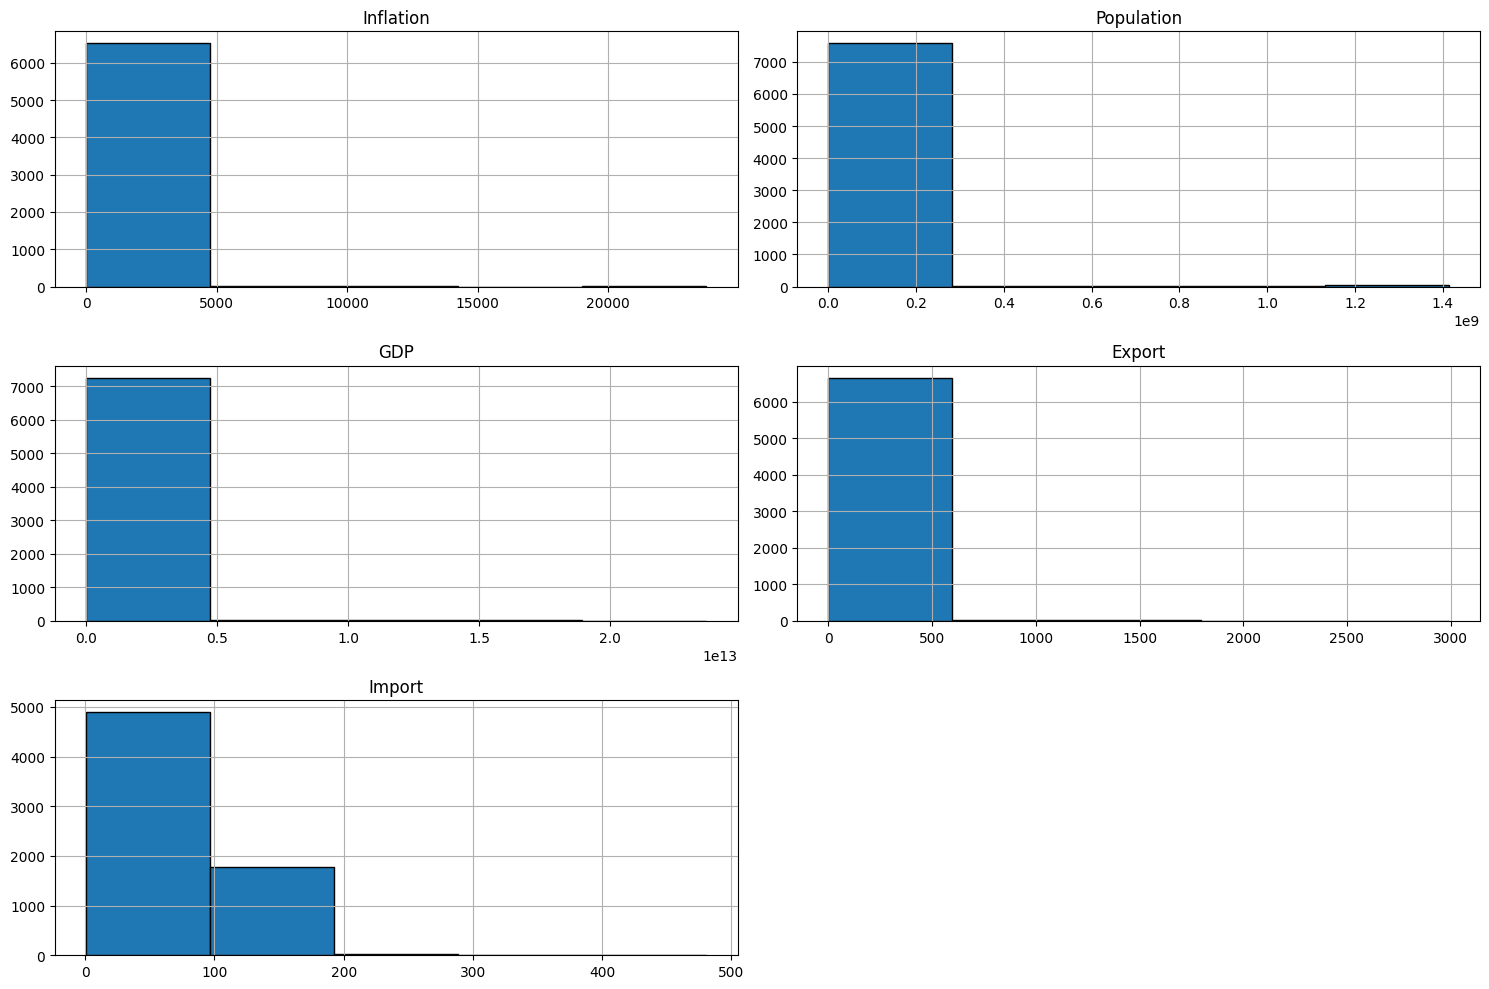

In [7]:
df.hist(figsize=(15, 10), bins=5, edgecolor='black')
plt.tight_layout()
#plt.savefig("df_hist.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
country_data = df.loc ['ECU']

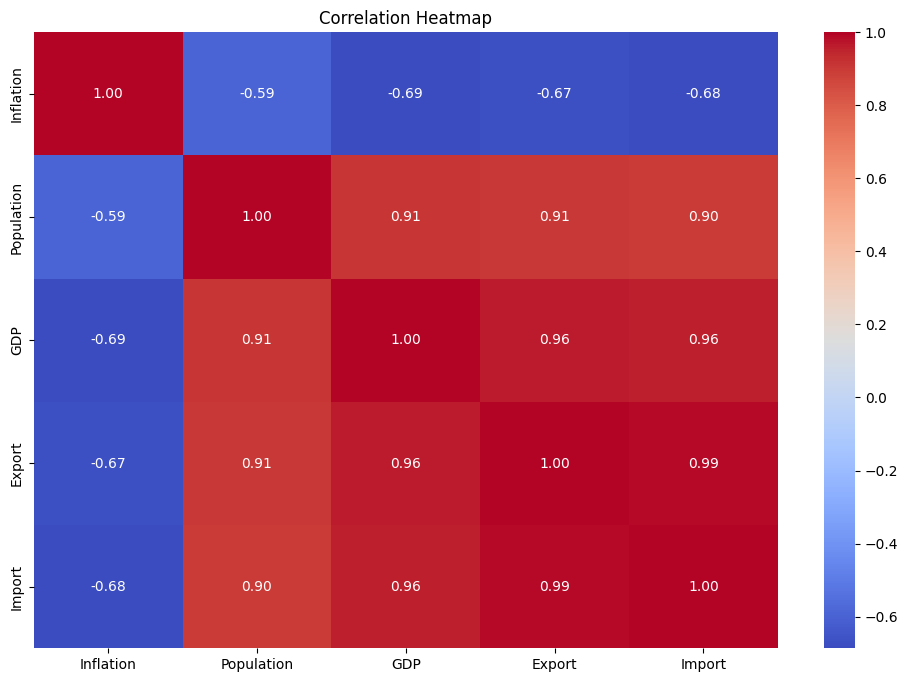

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(country_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
#plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


# Preprocessing

# Handeling missing values

In [10]:
df.describe()

,Inflation,Population,GDP,Export,Import
count,6524.000000,7.676000e+03,7.317000e+03,6718.000000,6718.000000
mean,27.307048,3.303254e+07,2.463399e+11,80.067353,60.338428
std,373.801095,1.257859e+08,1.174733e+12,126.718969,46.627973
min,-17.640424,7.649000e+03,2.101742e+07,0.116088,0.497513
25%,1.995485,1.426135e+06,2.727850e+09,24.089049,20.454348
50%,4.539524,6.160314e+06,1.307478e+10,60.117266,47.942225
75%,9.842515,2.009290e+07,7.884466e+10,104.985027,99.781272
max,23773.131774,1.414204e+09,2.368117e+13,2991.592051,480.734506


In [11]:
df.isnull().sum()

Inflation     1162
Population      10
GDP            369
Export         968
Import         968
dtype: int64

In [12]:
df.count()

Inflation     6524
Population    7676
GDP           7317
Export        6718
Import        6718
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

Inflation     0
Population    0
GDP           0
Export        0
Import        0
dtype: int64

In [15]:
df.count()

Inflation     5968
Population    5968
GDP           5968
Export        5968
Import        5968
dtype: int64

In [16]:
df

Inflation  Population           GDP      Export  \
Country Code Year                                                     
ABW          1986    1.073966     59931.0  4.055866e+08  105.022708   
             1987    3.643045     59159.0  4.877095e+08  115.503652   
             1988    3.121868     59331.0  5.966480e+08  135.066427   
             1989    3.991628     60443.0  6.955307e+08  101.349267   
             1990    5.836688     62753.0  7.648045e+08  123.596991   
...                       ...         ...           ...         ...   
ZWE          2017    0.893962  14812482.0  5.107466e+10  107.151887   
             2018   10.618866  15034452.0  3.415607e+10  124.909506   
             2019  255.304991  15271368.0  2.571741e+10  131.425343   
             2020  557.201817  15526888.0  2.686794e+10  135.325610   
             2021   98.546105  15797210.0  2.724052e+10  185.806800   

                       Import  
Country Code Year              
ABW          1986   47.432669  
             1987   58.364675  
             1988   83.150974  
             1989   95.561922  
             1990  132.571551  
...                       ...  
ZWE          2017   83.660837  
             2018  105.579357  
             2019   79.585840  
             2020   82.633621  
             2021  118.756526  

[5968 rows x 5 columns]

# Split Data into Train and Test Sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'GDP'), df['GDP'], test_size = 0.2, shuffle = True, random_state = 42)

In [18]:
X_train

,,Inflation,Population,Export,Import
Country Code,Year,,,,
PRY,2019,2.757097,6515058.0,95.347858,121.890206
COL,1984,16.161617,28642690.0,9.698867,8.319613
LKA,1988,13.991549,16078621.0,13.992320,11.944799
MDV,2017,2.817473,458287.0,132.802449,124.470395
CHL,1987,19.880846,12790150.0,8.420557,7.046885
...,...,...,...,...,...
MRT,1991,5.628667,2009738.0,23.718716,15.089968
SYR,2003,5.796829,17889296.0,646.393138,81.447482
TCD,2002,5.191819,9116192.0,7.625613,44.486486


In [19]:
y_train

Country Code  Year
PRY           2019    3.792534e+10
COL           1984    3.825312e+10
LKA           1988    6.978372e+09
MDV           2017    4.816426e+09
CHL           1987    2.225073e+10
                          ...     
MRT           1991    2.133693e+09
SYR           2003    2.182814e+10
TCD           2002    1.997006e+09
TTO           1982    8.140417e+09
BWA           2013    1.427174e+10
Name: GDP, Length: 4774, dtype: float64

In [20]:
X_test

,,Inflation,Population,Export,Import
Country Code,Year,,,,
MYS,1998,5.270342,21906713.0,36.636704,33.114687
BTN,2005,5.312631,661865.0,47.017776,36.423227
ECU,2004,2.743232,13608701.0,42.294779,38.229719
PLW,2017,1.417988,17812.0,100.548160,120.767583
USA,2020,1.233584,331526933.0,94.833040,103.957606
...,...,...,...,...,...
CAN,2010,1.776872,34005902.0,94.493249,93.621790
RUS,2005,12.685304,143518814.0,71.407274,64.985312
MDV,1989,7.165859,217738.0,26.573839,5.937733


In [21]:
y_test

Country Code  Year
MYS           1998    7.216750e+10
BTN           2005    8.603910e+08
ECU           2004    3.519495e+10
PLW           2017    2.856000e+08
USA           2020    2.135410e+13
                          ...     
CAN           2010    1.617343e+12
RUS           2005    7.640160e+11
MDV           1989    1.895144e+08
GAB           1994    4.190819e+09
MLT           2011    9.789362e+09
Name: GDP, Length: 1194, dtype: float64

# Data scaling

In [22]:
features_to_scale = ['Population', 'Inflation', 'Import', 'Export']

In [23]:
from sklearn.preprocessing import StandardScaler

scaler_features = StandardScaler()
X_train[features_to_scale] = scaler_features.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler_features.transform(X_test[features_to_scale])

#joblib.dump(scaler_features, 'scaler_features_all.pkl')

In [24]:
X_train

,,Inflation,Population,Export,Import
Country Code,Year,,,,
PRY,2019,-0.051824,-0.221080,0.129181,1.247759
COL,1984,-0.016838,-0.066857,-0.616014,-1.200355
LKA,1988,-0.022502,-0.154425,-0.578659,-1.122211
MDV,2017,-0.051667,-0.263294,0.455057,1.303377
CHL,1987,-0.007131,-0.177345,-0.627136,-1.227790
...,...,...,...,...,...
MRT,1991,-0.044329,-0.252481,-0.494033,-1.054414
SYR,2003,-0.043891,-0.141805,4.923586,0.375980
TCD,2002,-0.045470,-0.202951,-0.634053,-0.420747


In [25]:
X_test

,,Inflation,Population,Export,Import
Country Code,Year,,,,
MYS,1998,-0.045265,-0.113805,-0.381640,-0.665876
BTN,2005,-0.045154,-0.261876,-0.291318,-0.594557
ECU,2004,-0.051861,-0.171639,-0.332411,-0.555617
PLW,2017,-0.055319,-0.266364,0.174426,1.223559
USA,2020,-0.055801,2.044167,0.124701,0.861206
...,...,...,...,...,...
CAN,2010,-0.054383,-0.029476,0.121745,0.638408
RUS,2005,-0.025911,0.733800,-0.079116,0.021124
MDV,1989,-0.040317,-0.264971,-0.469192,-1.251699


In [26]:
print("number of training samples", X_train.shape[0])
print("number of test samples", X_test.shape[0])

number of training samples 4774
number of test samples 1194


# Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias =False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model1 = LinearRegression()
model1.fit(X_train_poly, y_train)



LinearRegression()

# Evaluation with test data for Regression model

In [28]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.1491767230862161


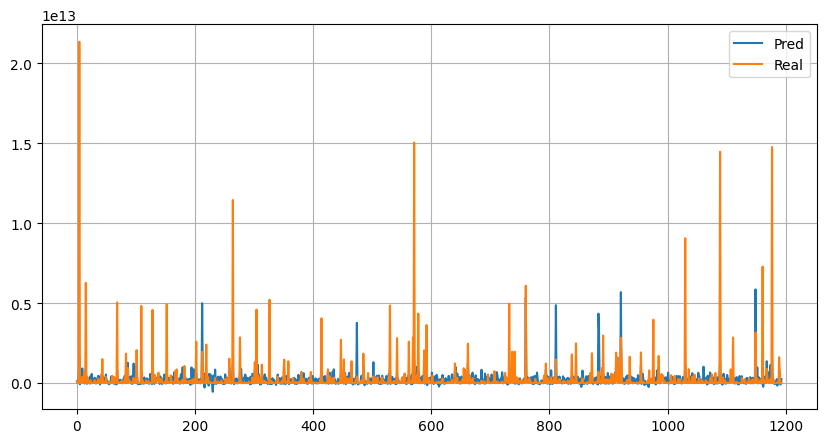

In [29]:
import matplotlib.pyplot as plt
y_test_reset = y_test.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

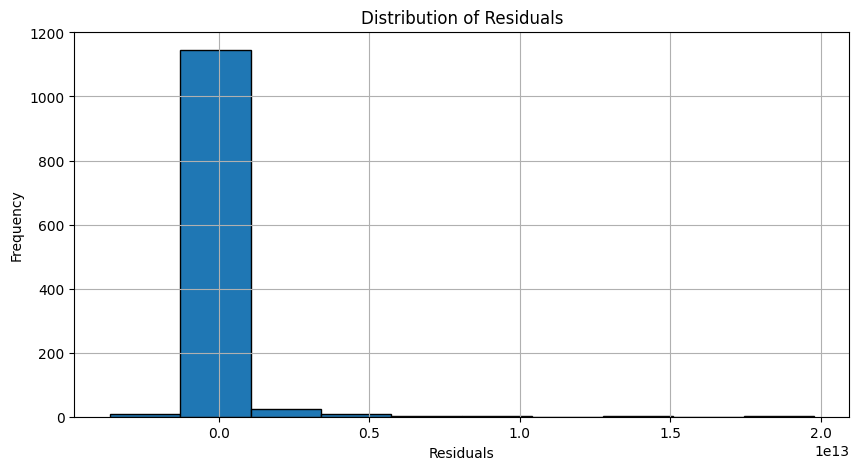

In [30]:
residuals = y_test_reset - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


# Ridge Model

In [31]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.05, 0, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]}


ridge = Ridge()

scorer = make_scorer(r2_score)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

model2 = Ridge(alpha=best_alpha)
model2.fit(X_train, y_train)

Best alpha: 200


Ridge(alpha=200)

# Evaluation with test data for Ridge model

In [32]:
from sklearn.metrics import r2_score
y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.14863028101440534


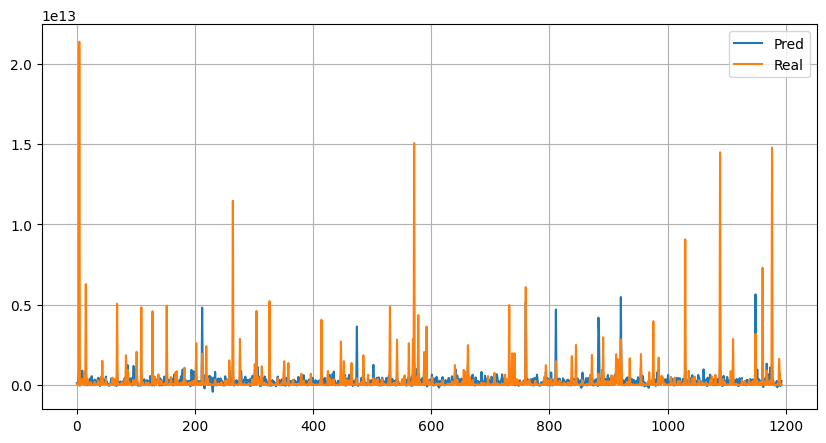

In [33]:
import matplotlib.pyplot as plt
y_test_reset = y_test.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

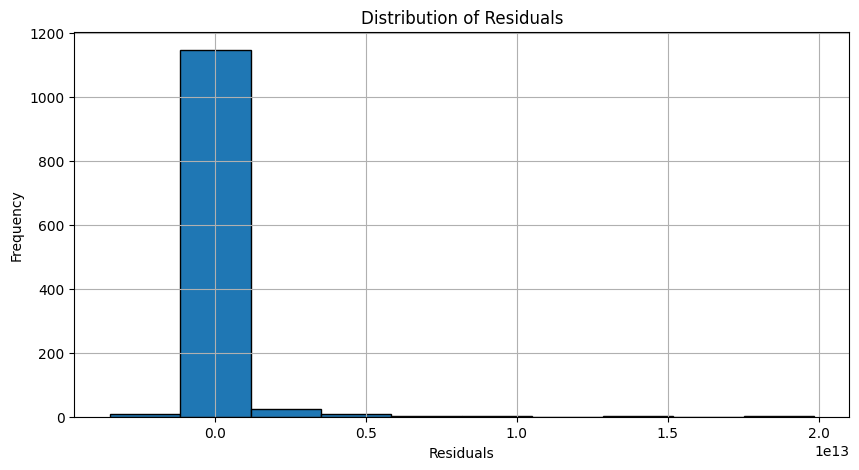

In [34]:
residuals = y_test_reset - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


# ElasticNet model

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.05, 0, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000],
    'l1_ratio': [0.01, 0.05, 0, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]
}

elastic_net = ElasticNet(random_state=42)

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

model3 = grid_search.best_estimator_

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.5}


# Evaluation with test data for ElasticNet

In [36]:
y_pred = model3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", r2)

Accuracy: 0.1484540243643454


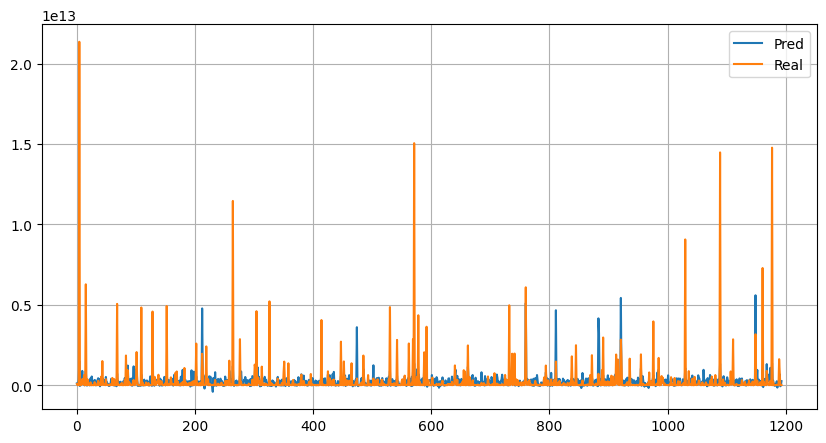

In [37]:
import matplotlib.pyplot as plt
y_test_reset = y_test.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

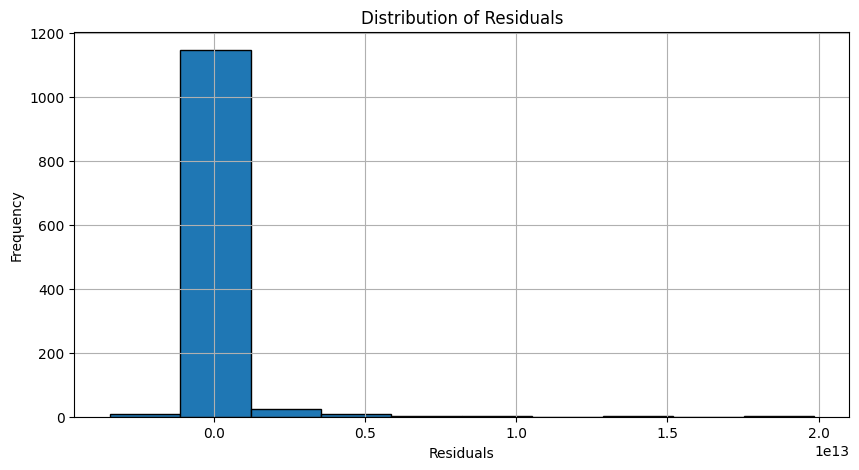

In [38]:
residuals = y_test_reset - y_pred
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=10, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


# Collecting the coefficients

In [39]:
coefficients_regression = model1.coef_
coefficients_regression

array([-3.53158529e+09,  5.49565266e+11, -8.37908478e+10,  2.08584759e+11])

In [40]:
coefficients_Ridge = model2.coef_
coefficients_Ridge

array([-3.85792945e+09,  5.27592579e+11, -7.23048655e+10,  1.93187820e+11])

In [41]:
coefficients_ElasticNet = model3.coef_
coefficients_ElasticNet

array([-3.90960014e+09,  5.23539337e+11, -7.03529850e+10,  1.90509042e+11])

# Coefficients for each Country

In [42]:
country_data = df.loc['ITA']

In [43]:
country_data

,Inflation,Population,GDP,Export,Import
Year,,,,,
1995,5.235423,56844303.0,1.177369e+12,51.153471,50.129139
1996,4.006977,56860281.0,1.314777e+12,55.207613,50.682289
1997,2.043108,56890372.0,1.244988e+12,52.608209,51.137124
1998,1.955086,56906744.0,1.272730e+12,53.786965,53.165044
1999,1.663460,56916317.0,1.255005e+12,51.546851,53.693534
2000,2.537685,56942108.0,1.149661e+12,52.630897,58.103149
2001,2.785165,56974100.0,1.172041e+12,53.500024,57.485918
2002,2.465323,57059007.0,1.281746e+12,55.674472,60.112920
2003,2.672556,57313203.0,1.582930e+12,65.501112,72.403412


In [44]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 1995 to 2021
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Inflation   27 non-null     float64
 1   Population  27 non-null     float64
 2   GDP         27 non-null     float64
 3   Export      27 non-null     float64
 4   Import      27 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


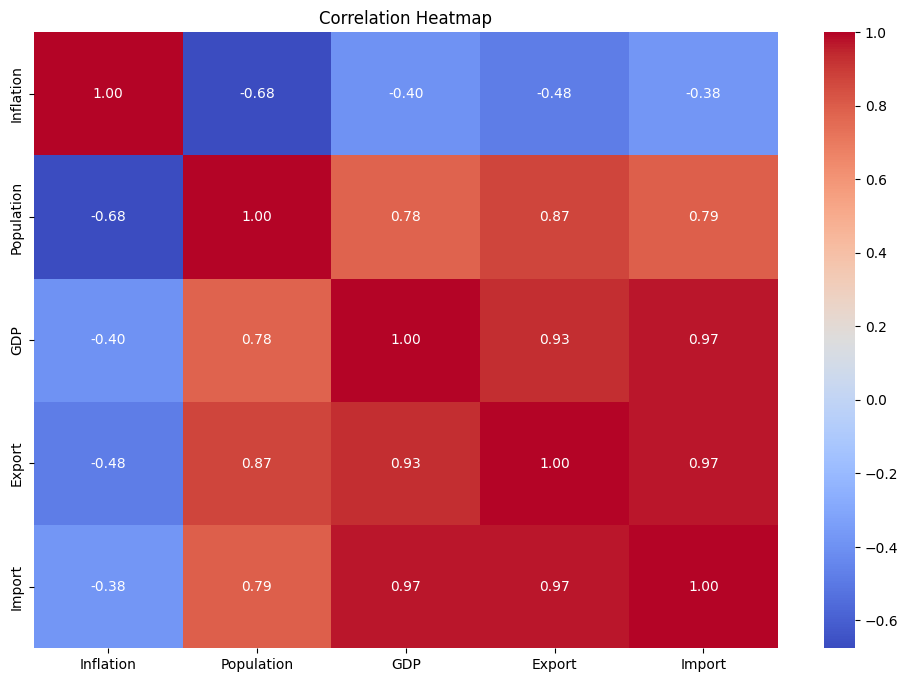

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(country_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
#plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(country_data.drop(columns = 'GDP'), country_data['GDP'], test_size = 0.2, shuffle = True, random_state = 42)

In [47]:
X_train1

,Inflation,Population,Export,Import
Year,,,,
2011,3.196102,46742697.0,108.600570,120.764632
2012,2.446128,46773055.0,104.597172,108.172855
2007,2.786797,45226803.0,89.734672,124.835577
2019,0.699519,47134837.0,118.331152,119.528151
1996,3.558846,39889852.0,37.940233,38.818498
1999,2.310348,40386875.0,37.031760,43.441470
2000,3.433516,40567864.0,40.728653,49.945938
1997,1.971074,40057389.0,35.697553,37.094034
2010,1.799865,46576897.0,90.131540,104.862685


In [48]:
X_test1

,Inflation,Population,Export,Import
Year,,,,
2003,3.038888,42187645.0,55.317441,66.891648
2008,4.075343,45954106.0,99.723514,134.937135
2004,3.039249,42921895.0,64.697093,82.837861
2016,-0.202598,46484062.0,102.730581,99.701745
1995,4.673803,39724050.0,34.668118,36.409375
2006,3.515576,44397319.0,75.712647,105.401638


In [49]:
scaler_feature = StandardScaler()
X_train1[features_to_scale] = scaler_feature.fit_transform(X_train1[features_to_scale])
X_test1[features_to_scale] = scaler_feature.transform(X_test1[features_to_scale])

#joblib.dump(scaler_features, 'scaler_features_all.pkl')

In [50]:
X_train1

,Inflation,Population,Export,Import
Year,,,,
2011,0.936497,0.782692,0.752107,0.942721
2012,0.373258,0.793088,0.633936,0.561877
2007,0.629105,0.263614,0.195229,1.065848
2019,-0.938467,0.916971,1.039331,0.905323
1996,1.208922,-1.563884,-1.333622,-1.535775
1999,0.271285,-1.393692,-1.360438,-1.395951
2000,1.114798,-1.331717,-1.251314,-1.199221
1997,0.016486,-1.506516,-1.399820,-1.587932
2010,-0.112094,0.725919,0.206944,0.461760


In [51]:
X_test1

,Inflation,Population,Export,Import
Year,,,,
2003,0.818428,-0.777066,-0.820687,-0.686691
2008,1.596818,0.512660,0.490077,1.371374
2004,0.818699,-0.525641,-0.543822,-0.204391
2016,-1.615967,0.694130,0.578838,0.305665
1995,2.046269,-1.620659,-1.430207,-1.608640
2006,1.176426,-0.020421,-0.218668,0.478061


In [52]:
print("number of training samples", X_train1.shape[0])
print("number of test samples", X_test1.shape[0])

number of training samples 21
number of test samples 6


# Regression Model

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias =False)
X_train_poly = poly.fit_transform(X_train1)
X_test_poly = poly.transform(X_test1)

model1 = LinearRegression()
model1.fit(X_train_poly, y_train1)



LinearRegression()

In [54]:
from sklearn.metrics import r2_score
y_pred = model1.predict(X_test_poly)
r2 = r2_score(y_test1, y_pred)
print("Accuracy:", r2)

Accuracy: 0.9617513713531385


In [55]:
model1.coef_

array([-1.29620979e+10,  2.49236876e+11, -2.35084508e+11,  3.31583083e+11])

In [56]:
features_name = X_train1
coefficients = model1.coef_

for name, coef in zip(features_name, coefficients):
    print(f"{name}:{coef}")

Inflation:-12962097904.035048
Population:249236875794.57495
Export:-235084507869.65097
Import:331583082632.07544


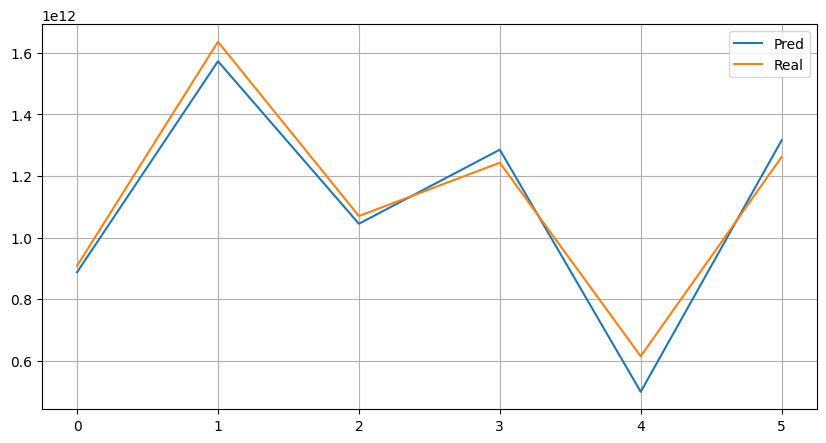

In [57]:
import matplotlib.pyplot as plt
y_test_reset = y_test1.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

# Ridge model

In [58]:
"""
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]}


ridge = Ridge()

scorer = make_scorer(r2_score)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train1, y_train1)


best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

model2 = Ridge(alpha=best_alpha)
model2.fit(X_train1, y_train1)
"""

'\nfrom sklearn.metrics import make_scorer, r2_score\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\'alpha\': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]}\n\n\nridge = Ridge()\n\nscorer = make_scorer(r2_score)\n\ngrid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)\ngrid_search.fit(X_train1, y_train1)\n\n\nbest_alpha = grid_search.best_params_[\'alpha\']\nprint("Best alpha:", best_alpha)\n\nmodel2 = Ridge(alpha=best_alpha)\nmodel2.fit(X_train1, y_train1)\n'

In [59]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import Ridge

model2 = Ridge(alpha = 1)

model2.fit(X_train1, y_train1)

Ridge(alpha=1)

In [60]:
from sklearn.metrics import r2_score
y_pred = model2.predict(X_test1)
r2 = r2_score(y_test1, y_pred)
print("Accuracy:", r2)

Accuracy: 0.9269119951567328


In [61]:
model2.coef_

array([-9.24867970e+09,  1.72481304e+11, -3.75274342e+10,  2.06406201e+11])

In [62]:
features_name = X_train1
coefficients = model2.coef_

for name, coef in zip(features_name, coefficients):
    print(f"{name}:{coef}")

Inflation:-9248679696.125366
Population:172481304429.02188
Export:-37527434205.00561
Import:206406201314.4806


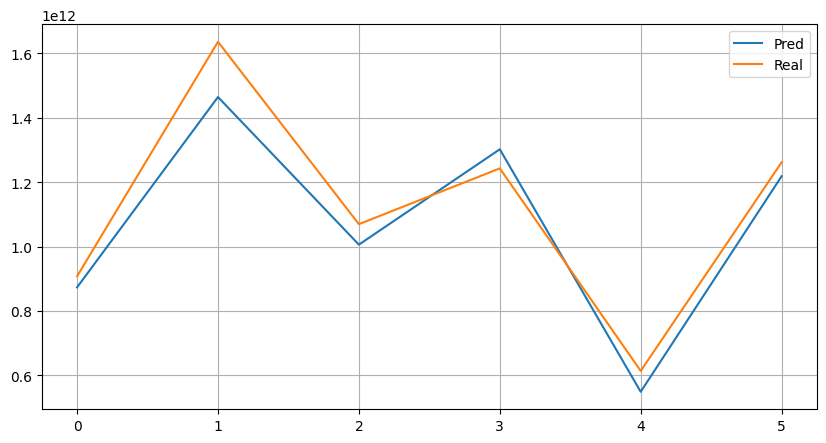

In [63]:
import matplotlib.pyplot as plt
y_test_reset = y_test1.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

# ElasticNet model

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, r2_score

param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000],
    'l1_ratio': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]  
}

elastic_net = ElasticNet(random_state=42)

scorer = make_scorer(r2_score)


grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train1, y_train1)


best_params = grid_search.best_params_
best_alpha = best_params['alpha']
best_l1_ratio = best_params['l1_ratio']
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

model3 = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
model3.fit(X_train1, y_train1)

Best alpha: 0.01
Best l1_ratio: 0.5


ElasticNet(alpha=0.01, random_state=42)

In [65]:
y_pred = model3.predict(X_test1)
r2 = r2_score(y_test1, y_pred)
print("Accuracy:", r2)

Accuracy: 0.9614332886923717


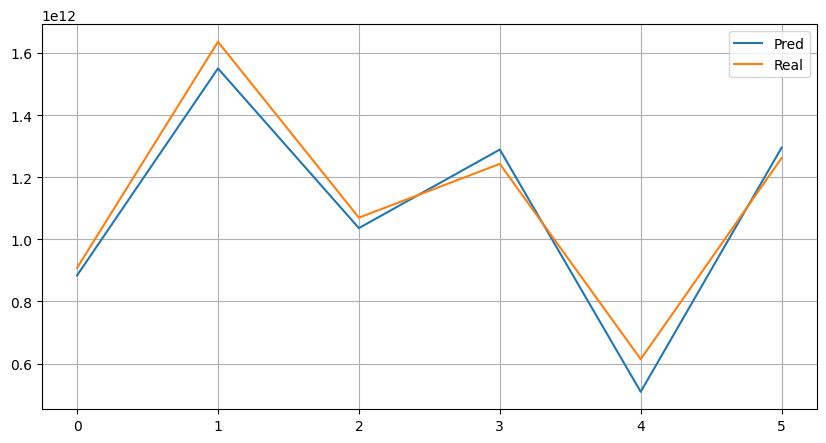

In [66]:
import matplotlib.pyplot as plt
y_test_reset = y_test1.reset_index(drop=True)
plt.figure(figsize = (10,5))
plt.plot(y_pred, label = 'Pred')
plt.plot(y_test_reset, label = 'Real')
plt.grid()
plt.legend()
plt.show()

In [67]:
coefficients_ElasticNet = model3.coef_
coefficients_ElasticNet

array([-1.16641867e+10,  2.34181890e+11, -1.92619480e+11,  3.04056868e+11])

In [68]:
features_name = X_train1
coefficients = model3.coef_

for name, coef in zip(features_name, coefficients):
    print(f"{name}:{coef}")

Inflation:-11664186729.928524
Population:234181889818.72696
Export:-192619480494.30414
Import:304056867723.23004


# Collecting Coefficients of first model (regression)

In [69]:
countries = df.index.get_level_values('Country Code').unique()
len(countries)

183

In [75]:
from sklearn.metrics import r2_score

results = []

countries = df.index.get_level_values('Country Code').unique()

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 20:
        print(f"Skipping {country}: fewer than 20 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    poly = PolynomialFeatures(degree=1, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model1 = LinearRegression()
    model1.fit(X_train_poly, y_train)
    
    coefficients = model1.coef_
    y_pred = model1.predict(X_test_poly)
    
    test_score = r2_score(y_test, y_pred)
    
    
    results.append({
        'Country': country,
        'Population_Coeff': coefficients[0],
        'Inflation_Coeff': coefficients[1],
        'Import_Coeff': coefficients[2],
        'Export_Coeff': coefficients[3],
        'Test_Score': test_score,
        'Export_GDP_Correlation': export_gdp_corr
    })

coefficients_df = pd.DataFrame(results)

coefficients_df.to_csv('linear_regression_coefficients_percountries.csv', index=False)
print("Coefficients with scores saved for all countries.")


Skipping AFG: fewer than 20 samples.
Skipping ARE: fewer than 20 samples.
Skipping BIH: fewer than 20 samples.
Skipping COM: fewer than 20 samples.
Skipping CUW: fewer than 20 samples.
Skipping CYM: fewer than 20 samples.
Skipping GIN: fewer than 20 samples.
Skipping IDN: fewer than 20 samples.
Skipping KIR: fewer than 20 samples.
Skipping LBN: fewer than 20 samples.
Skipping MOZ: fewer than 20 samples.
Skipping NAM: fewer than 20 samples.
Skipping NCL: fewer than 20 samples.
Skipping NRU: fewer than 20 samples.
Skipping SDN: fewer than 20 samples.
Skipping SLE: fewer than 20 samples.
Skipping SRB: fewer than 20 samples.
Skipping TJK: fewer than 20 samples.
Skipping UZB: fewer than 20 samples.
Skipping ZWE: fewer than 20 samples.
Coefficients with scores saved for all countries.


# Collecting Coefficients of second model (Ridge)

# with Global Standardization data

In [65]:
"""
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import joblib
import os 

os.makedirs("models", exist_ok = True)

results = []

countries = df.index.get_level_values('Country Code').unique()

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 20:
        print(f"Skipping {country}: fewer than 20 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    model = Ridge()
    model.fit(X_train, y_train)
    joblib.dump(model, f'models/{country}_model.pkl')
  
    coefficients = model.coef_
    r2_test = model.score(X_test, y_test)

    results.append({
        'Country': country,
        'Population_Coeff': coefficients[0],
        'Inflation_Coeff': coefficients[1],
        'Import_Coeff': coefficients[2],
        'Export_Coeff': coefficients[3],
        'Test_Score': r2_test,
        'Export_GDP_Correlation': export_gdp_corr
    })


coefficients_df = pd.DataFrame(results)
coefficients_df.to_csv('ridge_regression_coefficients_all_countries.csv', index=False)
print("Ridge regression coefficients (default alpha) saved for all countries.")
"""

'\nimport pandas as pd\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import train_test_split\nimport joblib\nimport os \n\nos.makedirs("models", exist_ok = True)\n\nresults = []\n\ncountries = df.index.get_level_values(\'Country Code\').unique()\n\nfor country in countries:\n    country_data = df.loc[country]\n    \n    if country_data.shape[0] < 20:\n        print(f"Skipping {country}: fewer than 20 samples.")\n        continue\n    \n    X = country_data[[\'Population\', \'Inflation\', \'Import\', \'Export\']]\n    y = country_data[\'GDP\']\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    \n    export_gdp_corr = country_data[[\'Export\', \'GDP\']].corr().iloc[0, 1]\n    \n    model = Ridge()\n    model.fit(X_train, y_train)\n    joblib.dump(model, f\'models/{country}_model.pkl\')\n  \n    coefficients = model.coef_\n    r2_test = model.score(X_test, y_test)\n\n    results.append({\n        \'Country\': c

# Separate Standardization for each Country

In [76]:
df

Inflation  Population           GDP      Export  \
Country Code Year                                                     
ABW          1986    1.073966     59931.0  4.055866e+08  105.022708   
             1987    3.643045     59159.0  4.877095e+08  115.503652   
             1988    3.121868     59331.0  5.966480e+08  135.066427   
             1989    3.991628     60443.0  6.955307e+08  101.349267   
             1990    5.836688     62753.0  7.648045e+08  123.596991   
...                       ...         ...           ...         ...   
ZWE          2017    0.893962  14812482.0  5.107466e+10  107.151887   
             2018   10.618866  15034452.0  3.415607e+10  124.909506   
             2019  255.304991  15271368.0  2.571741e+10  131.425343   
             2020  557.201817  15526888.0  2.686794e+10  135.325610   
             2021   98.546105  15797210.0  2.724052e+10  185.806800   

                       Import  
Country Code Year              
ABW          1986   47.432669  
             1987   58.364675  
             1988   83.150974  
             1989   95.561922  
             1990  132.571551  
...                       ...  
ZWE          2017   83.660837  
             2018  105.579357  
             2019   79.585840  
             2020   82.633621  
             2021  118.756526  

[5968 rows x 5 columns]

In [78]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import os
import joblib
from sklearn.preprocessing import StandardScaler

os.makedirs("models", exist_ok = True)
os.makedirs("scalers", exist_ok = True)

results = []

countries = df.index.get_level_values('Country Code').unique()

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 20:
        print(f"Skipping {country}: fewer than 20 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test)       
    
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    model = Ridge(0.01)
    model.fit(X_train_scaled, y_train)
    
    joblib.dump(model, f'models/{country}_model.pkl')
    joblib.dump(scaler, f'scalers/{country}_scaler.pkl')
  
    coefficients = model.coef_
    r2_test = model.score(X_test_scaled, y_test)

    results.append({
        'Country': country,
        'Population_Coeff': coefficients[0],
        'Inflation_Coeff': coefficients[1],
        'Import_Coeff': coefficients[2],
        'Export_Coeff': coefficients[3],
        'Test_Score': r2_test,
        'Export_GDP_Correlation': export_gdp_corr
    })


coefficients_df = pd.DataFrame(results)
coefficients_df.to_csv('ridge_regression_per_country_NewAlpha.csv', index=False)
print("Models and scalers saved for each country.")


Skipping AFG: fewer than 20 samples.
Skipping ARE: fewer than 20 samples.
Skipping BIH: fewer than 20 samples.
Skipping COM: fewer than 20 samples.
Skipping CUW: fewer than 20 samples.
Skipping CYM: fewer than 20 samples.
Skipping GIN: fewer than 20 samples.
Skipping IDN: fewer than 20 samples.
Skipping KIR: fewer than 20 samples.
Skipping LBN: fewer than 20 samples.
Skipping MOZ: fewer than 20 samples.
Skipping NAM: fewer than 20 samples.
Skipping NCL: fewer than 20 samples.
Skipping NRU: fewer than 20 samples.
Skipping SDN: fewer than 20 samples.
Skipping SLE: fewer than 20 samples.
Skipping SRB: fewer than 20 samples.
Skipping TJK: fewer than 20 samples.
Skipping UZB: fewer than 20 samples.
Skipping ZWE: fewer than 20 samples.
Models and scalers saved for each country.


# with focus on accuracy of Ridge model

In [ ]:
"""
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

results = []

countries = df.index.get_level_values('Country Code').unique()

alpha_values = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000]

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 20:
        print(f"Skipping {country}: fewer than 20 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    best_alpha = None
    best_r2_test = -float('inf')
    best_coefficients = None
    
    for alpha in alpha_values:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
        
        r2_test = model.score(X_test, y_test)
        
        if r2_test > best_r2_test:
            best_alpha = alpha
            best_r2_test = r2_test
            best_coefficients = model.coef_
    
    if best_coefficients is not None:
        results.append({
            'Country': country,
            'Best Alpha': best_alpha,
            'Population_Coeff': best_coefficients[0],
            'Inflation_Coeff': best_coefficients[1],
            'Import_Coeff': best_coefficients[2],
            'Export_Coeff': best_coefficients[3],
            'Test_Score': best_r2_test,
            'Export_GDP_Correlation': export_gdp_corr
        })

coefficients_df = pd.DataFrame(results)
coefficients_df.to_csv('ridge_regression_coefficients_all_countries.csv', index=False)
print("Ridge coefficients saved for all countries.")
"""

# Collecting Coefficients for third model (ElasticNet)

In [ ]:
"""
results = []

countries = df.index.get_level_values('Country Code').unique()

param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 1000],
    'l1_ratio': [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 1.0]
}

for country in countries:
    country_data = df.loc[country]
    
    if country_data.shape[0] < 20:
        print(f"Skipping {country}: fewer than 20 samples.")
        continue
    
    X = country_data[['Population', 'Inflation', 'Import', 'Export']]
    y = country_data['GDP']
    export_gdp_corr = country_data[['Export', 'GDP']].corr().iloc[0, 1]
    
    elastic_net = ElasticNet(random_state=42)
    scorer = make_scorer(r2_score)
    grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=min(5, X.shape[0]), n_jobs=-1)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_alpha = best_params['alpha']
    best_l1_ratio = best_params['l1_ratio']
    
    model3 = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
    model3.fit(X, y)
    
    coefficients = model3.coef_
    
    results.append({
        'Country': country,
        'Best Alpha': best_alpha,
        'Best L1 Ratio': best_l1_ratio,
        'Population_Coeff': coefficients[0],
        'Inflation_Coeff': coefficients[1],
        'Import_Coeff': coefficients[2],
        'Export_Coeff': coefficients[3],
        'Score': model3.score(X, y),
        'Export_GDP_Correlation': export_gdp_corr
    })


coefficients_df = pd.DataFrame(results)

coefficients_df.to_csv('elastic_net_coefficients_all_countries.csv', index=False)
print("ElasticNet coefficients saved for all countries.")
"""